### Import and download necessary packages

In [3]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.6/76.6 MB 18.6 MB/s eta 0:00:00


In [4]:
# data viz
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns

# data manipulation
import pandas as pd
import numpy as np
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

# Basic packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import sklearn
import scipy
from scipy import linalg
import itertools
import seaborn as sns
from sklearn.pipeline import Pipeline

# All the kinds of models we might use.
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.mixture import GaussianMixture
from sklearn.metrics import mean_squared_error, precision_score, recall_score, f1_score, RocCurveDisplay, accuracy_score
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score


#import umap
#from umap import UMAP
import os
import pickle
import random
import imblearn
# pip install -U imbalanced-learn
from imblearn.over_sampling import SMOTENC
# pip install --upgrade tensorflow
import tensorflow as tf
# %pip install xgboost
import xgboost as xgb

In [5]:
def performance_scores(model, X_test, y_test):
  scores = {}
  # Make predictions
  pred_proba = model.predict_proba(X_test)[:,1]
  pred = model.predict(X_test)
  # Calculate scores
  roc = roc_auc_score(y_test, pred_proba)
  recall = recall_score(y_test, pred)
  precision = precision_score(y_test, pred)
  f1 = f1_score(y_test, pred)
  # Append scores to hashmap and return the hashmap
  scores["roc"] = roc
  scores["recall"] = recall
  scores["precision"] = precision
  scores["f1"] = f1
  return scores

### Import data

In [6]:
import os
import sys
from google.colab import drive
drive.mount('/content/gdrive/')
dataset_path = '/content/gdrive/MyDrive/ids705/final_project/'
sys.path.append(dataset_path)
os.chdir('/content/gdrive/MyDrive/ids705/final_project/')
cwd = os.getcwd()
print("Current working directory: {0}".format(cwd))

Mounted at /content/gdrive/
Current working directory: /content/gdrive/MyDrive/ids705/final_project


In [7]:
def spitoutstats(answers, guesses, ndigits=6):
  corr_t = scipy.stats.pearsonr(answers, guesses)[0]
  loss_t = mean_squared_error(answers, guesses)
  precision_t = precision_score(answers, guesses)
  recall_t = recall_score(answers, guesses)
  accuracy_t = accuracy_score(answers, guesses)
  f1_t = f1_score(answers, guesses)
  print("     Corr:", round(corr_t,ndigits))
  print(" Loss MSE:", round(loss_t,ndigits))
  print("Precision:", round(precision_t,ndigits))
  print("   Recall:", round(recall_t,ndigits))
  print(" Accuracy:", round(accuracy_t,ndigits))
  print(" F1 score:", round(f1_t,ndigits))
  return [corr_t,loss_t,precision_t,recall_t,accuracy_t,f1_t]

In [8]:
df_preA = pd.read_csv("./cleanData/emory.csv",sep = ",")
df_preA.head()
df_preB = pd.read_csv("./cleanData/beth.csv",sep = ",")
df_preB.head()
df_final = pd.concat([df_preA, df_preB])
print(df_final.shape)

(1552210, 41)


In [9]:
df_final.head()

,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,EtCO2,BaseExcess,HCO3,...,WBC,Fibrinogen,Platelets,Age,Gender,Unit1,Unit2,HospAdmTime,ICULOS,SepsisLabel
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,59.0,1.0,1.0,0.0,-6.01,1.0,0.0
1,102.0,100.0,NaN,NaN,NaN,NaN,22.0,NaN,NaN,NaN,...,NaN,NaN,NaN,59.0,1.0,1.0,0.0,-6.01,2.0,0.0
2,102.0,100.0,NaN,99.0,84.0,76.0,18.5,NaN,NaN,NaN,...,NaN,NaN,NaN,59.0,1.0,1.0,0.0,-6.01,3.0,0.0
3,124.0,100.0,NaN,97.0,70.0,55.0,16.0,NaN,NaN,NaN,...,NaN,NaN,NaN,59.0,1.0,1.0,0.0,-6.01,4.0,0.0
4,98.0,100.0,NaN,95.0,73.0,62.0,18.0,NaN,NaN,NaN,...,6.8,NaN,276.0,59.0,1.0,1.0,0.0,-6.01,5.0,0.0


In [10]:
# Check for missing values
missing_values = df_final.isnull().sum()
print(missing_values)

HR                   153399
O2Sat                202736
Temp                1026984
SBP                  226265
MAP                  193270
DBP                  486554
Resp                 238335
EtCO2               1494574
BaseExcess          1468065
HCO3                1487182
FiO2                1422845
pH                  1444637
PaCO2               1465909
SaO2                1498649
AST                 1527027
BUN                 1445642
Alkalinephos        1527269
Calcium             1460879
Chloride            1481744
Creatinine          1457594
Bilirubin_direct    1549220
Glucose             1286694
Lactate             1510764
Magnesium           1454259
Phosphate           1489909
Potassium           1407685
Bilirubin_total     1529069
TroponinI           1537429
Hct                 1414777
Hgb                 1437619
PTT                 1506511
WBC                 1452763
Fibrinogen          1541968
Platelets           1460001
Age                       0
Gender              

### EDA

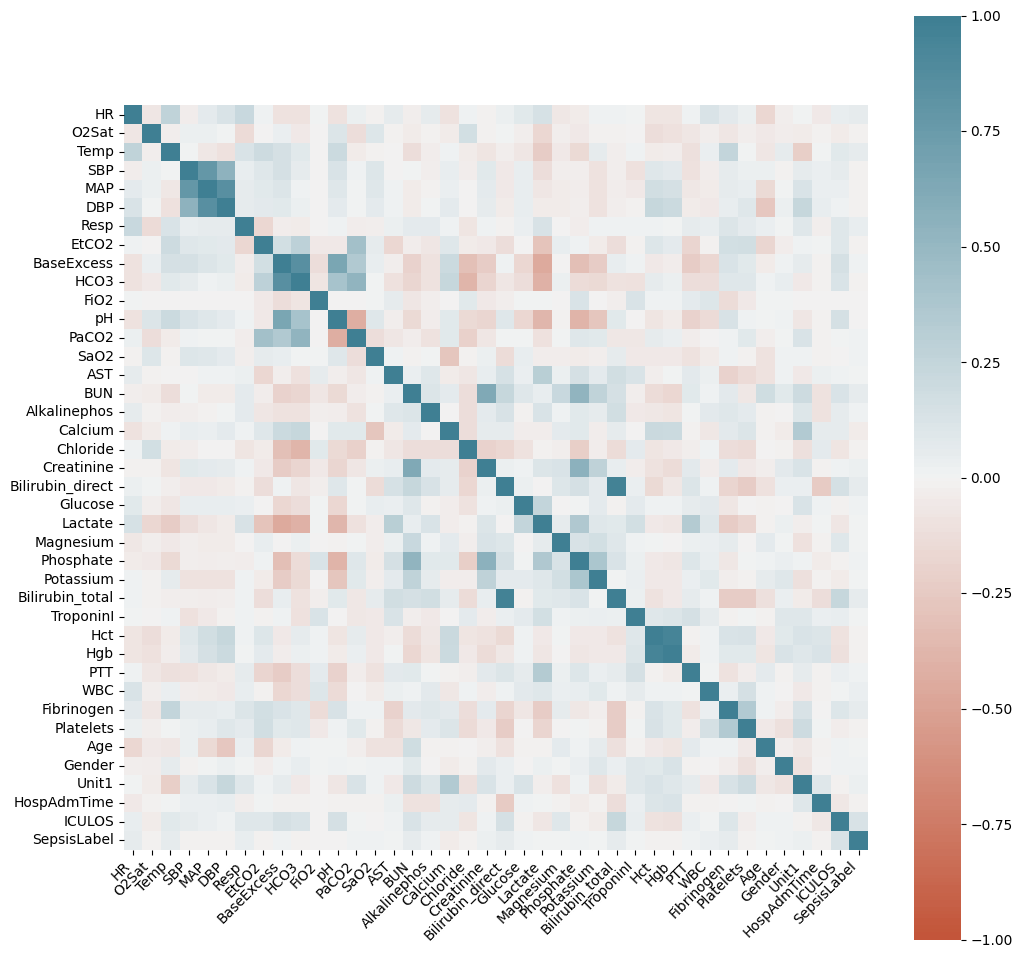

In [ ]:
# Correlation Plot
def plot_correlation_matrix(df, figsize=(12, 12)):
    corr = df.corr()
    
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(
        corr,
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True,
        ax=ax
    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right'
    )
    plt.show()
plot_correlation_matrix(df_final.drop("Unit2",axis=1))


<ipython-input-50-4fe554213760>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


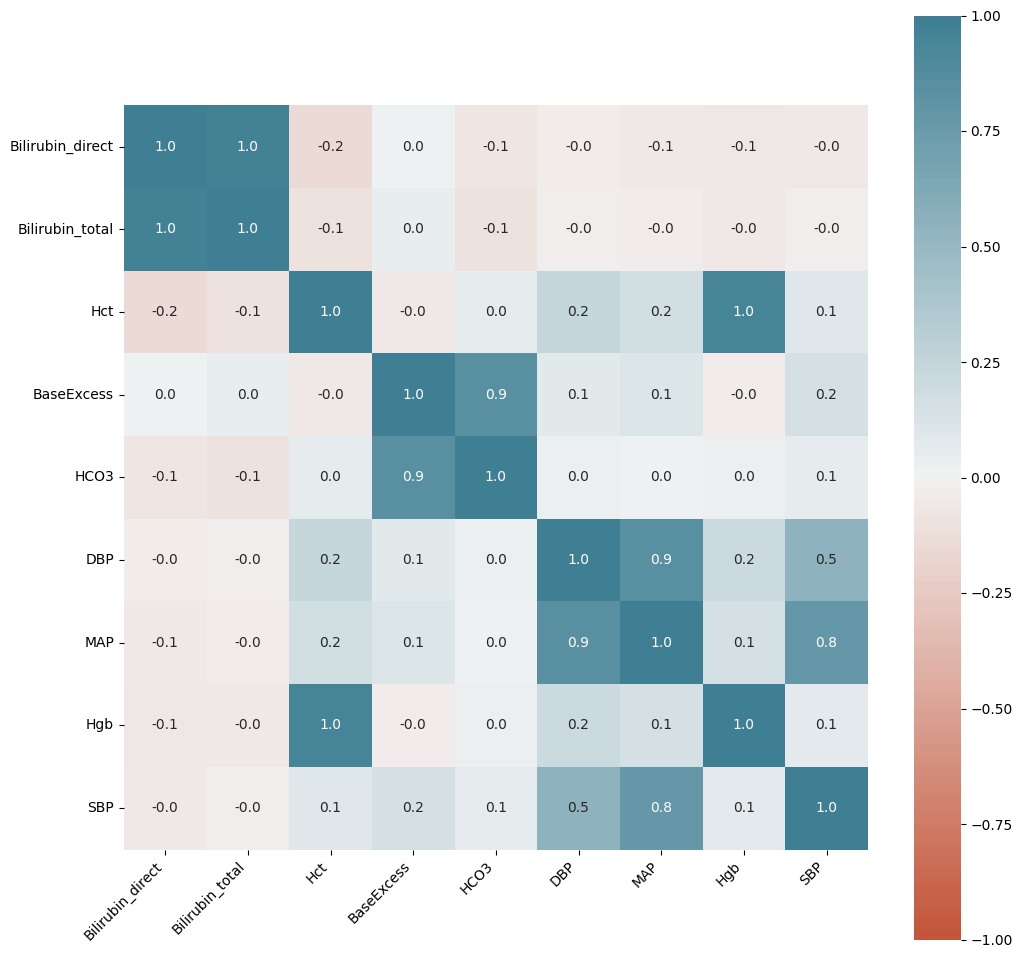

In [ ]:
def plot_top_correlations(df, top_n=5, figsize=(12, 12)):
    # Calculate the correlation matrix
    corr_matrix = df.corr().abs()
    
    # Get the upper triangle of the correlation matrix
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    
    # Select the top_n highest correlations, excluding self-correlations (diagonal elements)
    top_correlations = upper_triangle.stack().nlargest(top_n)
    
    # Get the pairs of features with the highest correlations
    top_feature_pairs = top_correlations.index.tolist()
    
    # Get the unique feature names involved in the top_n correlations
    top_features = list(set([feature for pair in top_feature_pairs for feature in pair]))
    
    # Create a DataFrame with the top_n highest correlated features
    top_corr_df = df[top_features]
    
    # Calculate the correlation matrix for the selected features
    top_corr_matrix = top_corr_df.corr()
    
    # Create a custom formatter to display values with 1 decimal place
    formatter = lambda x: f'{x:.1f}'
    
    # Plot the heatmap
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(
        top_corr_matrix,
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True,
        ax=ax,
        annot=True,
        fmt='.1f',  # Use the custom formatter for annotations
    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right'
    )
    plt.show()
    return top_feature_pairs

# Example usage with a random DataFrame
np.random.seed(42)
data = np.random.rand(100, 40)
df = pd.DataFrame(data)

top_features = plot_top_correlations(df_final.drop("Unit2",axis=1), top_n=5)


In [ ]:
df_final.drop()

In [ ]:
def get_top_correlations(df, top_n=10, threshold=0.7):
    # Calculate the correlation matrix
    corr_matrix = df.corr().abs()
    
    # Get the upper triangle of the correlation matrix
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
    
    # Filter the correlations based on the threshold
    filtered_correlations = upper_triangle[upper_triangle >= threshold]
    
    # Select the top_n highest correlations, excluding self-correlations (diagonal elements)
    top_correlations = filtered_correlations.stack().nlargest(top_n)
    
    return top_correlations
top_correlations = get_top_correlations(df_final.drop("Unit2",axis=1))

<ipython-input-52-fec6b4300b88>:6: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


In [ ]:
top_correlations

Bilirubin_direct  Bilirubin_total    0.963987
Hct               Hgb                0.952208
BaseExcess        HCO3               0.856930
MAP               DBP                0.852315
SBP               MAP                0.780469
dtype: float64

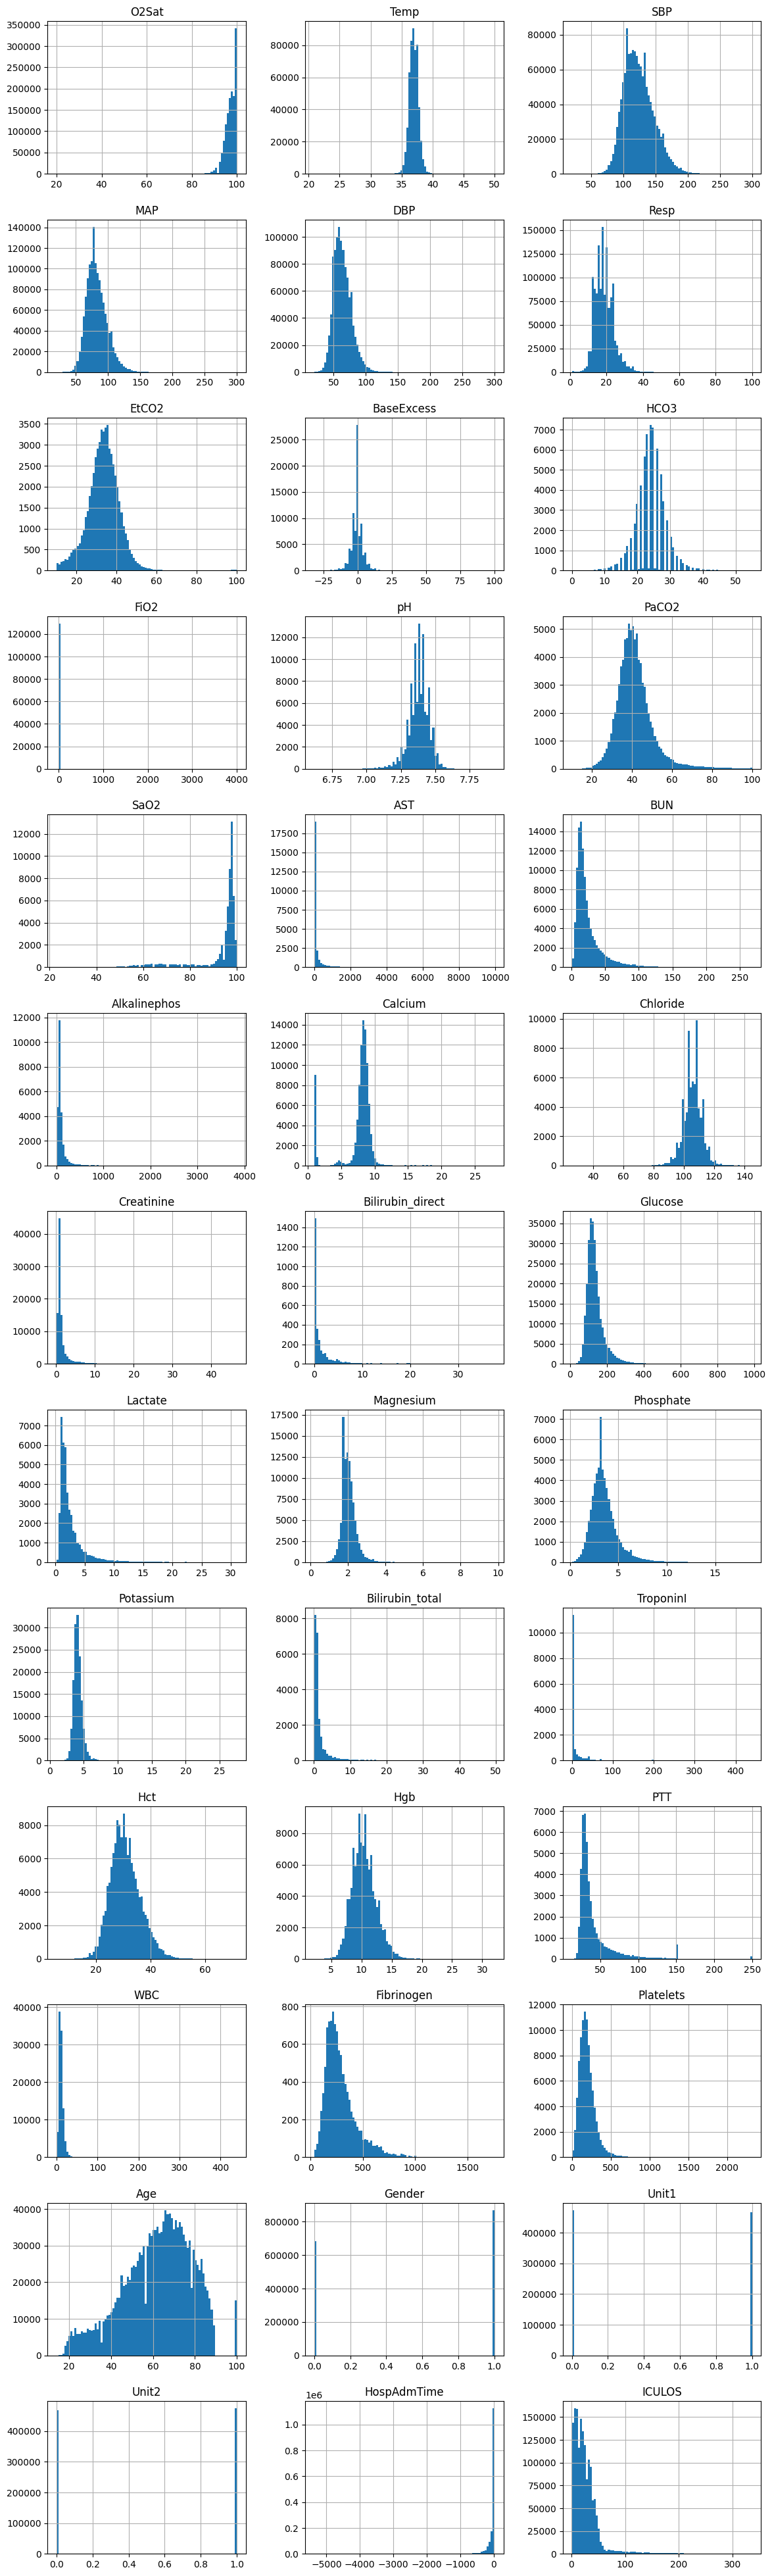

In [ ]:
# plot all histrogram for all varaibles
fig, axes = plt.subplots(len(df_final.columns) // 3 , 3, figsize = (14,50))

i = 1
for triaxis in axes:
    for axis in triaxis:
        df_final.hist(column = df_final.columns[i], bins = 90, ax=axis)
        i = i+1

### Train Test Split

In [13]:
# separate features and labels 
X = df_final.drop('SepsisLabel', axis=1)
y = df_final['SepsisLabel']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X,
                                                                        y,
                                                                        test_size=0.2,
                                                                        random_state=1,
                                                                        stratify = y)
# print dimensions of the splited datasets
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1241768, 40)
(310442, 40)
(1241768,)
(310442,)


In [14]:
# Count the number of occurrences of each class
class_counts = y_train.value_counts()

# Calculate the proportion of each class
class_proportions = class_counts  / len(y_train)

print('training dataset')
print(class_proportions)


# Count the number of occurrences of each class
class_counts = y_test.value_counts()

# Calculate the proportion of each class
class_proportions = class_counts  / len(y_test)

print('testing dataset')
print(class_proportions)

training dataset
0.0    0.982015
1.0    0.017985
Name: SepsisLabel, dtype: float64
testing dataset
0.0    0.982016
1.0    0.017984
Name: SepsisLabel, dtype: float64


### Iterative Imputation

In [ ]:
# Initialize the imputer with default settings
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Initialize the imputer with default settings
imputer = IterativeImputer()

# Fit the imputer on the training set
imputer.fit(X_train)

# Transform the training set with the imputed values
imputed_train = imputer.transform(X_train)

# Transform the testing set with the imputed values
imputed_test = imputer.transform(X_test)

# Convert the numpy arrays back to pandas DataFrames
imputed_X_train = pd.DataFrame(imputed_train, columns=X_train.columns)
imputed_X_train = pd.DataFrame(imputed_test, columns=X_train.columns)

# Check for missing values in the imputed datasets
missing_values_train = imputed_X_train.isnull().sum()
missing_values_test = imputed_X_train.isnull().sum()

print("Missing values in training set:\n", missing_values_train)
print("\nMissing values in testing set:\n", missing_values_test)

/usr/local/lib/python3.9/dist-packages/sklearn/impute/_iterative.py:785: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Missing values in training set:
 HR                  0
O2Sat               0
Temp                0
SBP                 0
MAP                 0
DBP                 0
Resp                0
EtCO2               0
BaseExcess          0
HCO3                0
FiO2                0
pH                  0
PaCO2               0
SaO2                0
AST                 0
BUN                 0
Alkalinephos        0
Calcium             0
Chloride            0
Creatinine          0
Bilirubin_direct    0
Glucose             0
Lactate             0
Magnesium           0
Phosphate           0
Potassium           0
Bilirubin_total     0
TroponinI           0
Hct                 0
Hgb                 0
PTT                 0
WBC                 0
Fibrinogen          0
Platelets           0
Age                 0
Gender              0
Unit1               0
Unit2               0
HospAdmTime         0
ICULOS              0
dtype: int64

Missing values in testing set:
 HR                  0
O2Sat              

### Mean Imputation

In [ ]:
from sklearn.impute import SimpleImputer

# Initialize the imputer with mean strategy
mean_imputer = SimpleImputer(strategy='mean')

# Fit the imputer on the training set
mean_imputer.fit(X_train)

# Transform the training set with the imputed values
mean_imputed_train = mean_imputer.transform(X_train)

# Transform the testing set with the imputed values
mean_imputed_test = mean_imputer.transform(X_test)

# Convert the numpy arrays back to pandas DataFrames
mean_imputed_train_df = pd.DataFrame(mean_imputed_train, columns=X_train.columns)
mean_imputed_test_df = pd.DataFrame(mean_imputed_test, columns=X_train.columns)

# Check for missing values in the imputed datasets
missing_values_train = mean_imputed_train_df.isnull().sum()
missing_values_test = mean_imputed_test_df.isnull().sum()

print("Missing values in training set:\n", missing_values_train)
print("\nMissing values in testing set:\n", missing_values_test)

### Compare imputation methods

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# CatBoost pipeline that imputes with the mean
CatBoost_mean_pipe = Pipeline([
                              ("imputer", SimpleImputer()),
                              ("model", CatBoostClassifier(verbose=1000))
])

# CatBoost pipeline that imputes with an iterative imputer
CatBoost_iter_pipe = Pipeline([
                              ("imputer", IterativeImputer(random_state=1, verbose=2)),
                              ("model", CatBoostClassifier(verbose=1000))
])

# XGBoost pipeline that imputes with the mean
XGB_mean_pipe = Pipeline([
                         ("imputer", SimpleImputer()),
                         ("model", XGBClassifier(random_state=1))
])

# XGBoost pipeline that imputes with an iterative imputer
XGB_iter_pipe = Pipeline([
                         ("imputer", IterativeImputer(random_state=1, verbose=2)),
                         ("model", XGBClassifier(random_state=1))
])

# CatBoost pipeline without imputation


CB = CatBoostClassifier(verbose=1000)

# XGBoost pipeline withou imputation

XGB = XGBClassifier(random_state=1)

In [ ]:
# print out model performences
CatBoost_mean_pipe.fit(X_train, y_train)
CatBoost_iter_pipe.fit(X_train, y_train)
CB.fit(X_train, y_train)
XGB_mean_pipe.fit(X_train, y_train)
XGB_iter_pipe.fit(X_train, y_train)
XGB.fit(X_train, y_train)

print("Catboost mean")
print(performance_scores(CatBoost_mean_pipe, X_test, y_test))

print("Catboost iter")
print(performance_scores(CatBoost_iter_pipe, X_test, y_test))

print("Catboost non")
print(performance_scores(CB, X_test, y_test))


print("Xgboost mean")
print(performance_scores(XGB_mean_pipe, X_test, y_test))

print("Catboost mean")
print(performance_scores(XGB_iter_pipe, X_test, y_test))

print("Catboost mean")
print(performance_scores(XGB, X_test, y_test))

### Dimension Reduction

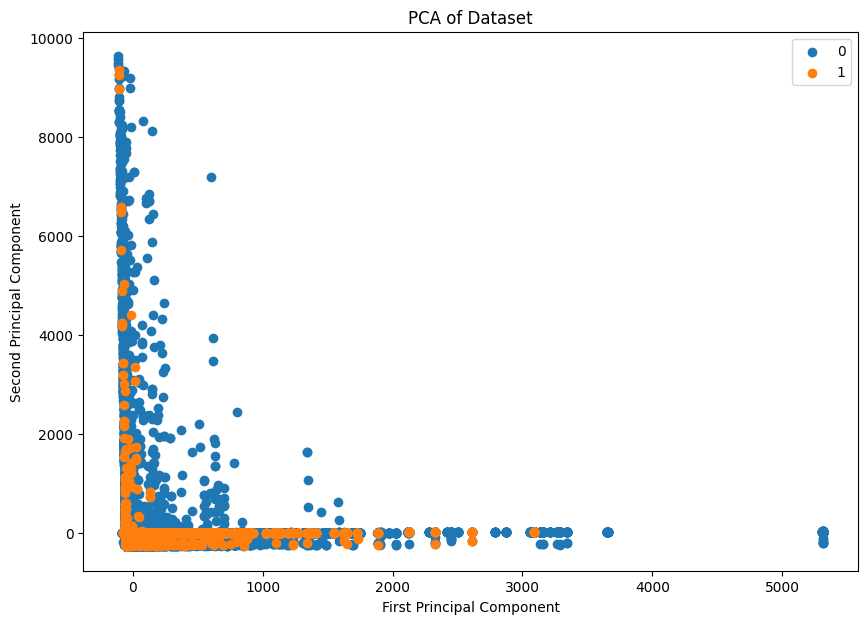

In [16]:
# separate features and labels 

# Apply PCA for the training dataset
pca = PCA(n_components=2)
X_pca = pca.fit_transform(mean_imputed_train)

# Plot the 2D data
plt.figure(figsize=(10, 7))
for label in range(2):
    plt.scatter(X_pca[y_train == label, 0], X_pca[y_train == label, 1], label=str(label))
plt.legend()
plt.title('PCA of Dataset')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.show()

#### SMOTE OverSampling without scaling

In [20]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from imblearn.over_sampling import SMOTE
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from catboost import CatBoostClassifier
from imblearn.under_sampling import RandomUnderSampler



In [ ]:
# Preprocess the dataset using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(mean_imputed_train)
X_test_scaled = scaler.transform(mean_imputed_test)

# Balance the training dataset using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Train the CatBoost model using the balanced and preprocessed dataset
catboost_smote = CatBoostClassifier(logging_level='Silent', random_state=42)
catboost_smote.fit(X_train_resampled, y_train_resampled)

# Train the XGBoost model using the balanced and preprocessed dataset

xgb_smote = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_smote.fit(X_train_resampled, y_train_resampled)

In [ ]:
# Evaluate the model
print("xgb under")
performance_scores(xgb_smote, mean_imputed_test, y_test)

xgb under


{'roc': 0.7651467181061555,
 'recall': 0.08042271180368978,
 'precision': 0.1897717666948436,
 'f1': 0.11297018492892187}

In [ ]:
# Evaluate the model
print("catboost under")
performance_scores(catboost_smote, mean_imputed_test, y_test)

catboost under


{'roc': 0.8395851354594535,
 'recall': 0.09009493104065915,
 'precision': 0.37762762762762764,
 'f1': 0.14548083875632684}

### Undersampling without Scaling



In [ ]:
# Apply RandomUnderSampler to the training dataset
rus = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(mean_imputed_train, y_train)

# Train the CatBoost model using the downsampled and preprocessed dataset
catboost_under = CatBoostClassifier(logging_level='Silent', random_state=42)
catboost_under.fit(X_train_resampled, y_train_resampled)

# Train the XGBoost model using the downsampled and preprocessed dataset

xgb_under = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_under.fit(X_train_resampled, y_train_resampled)

In [ ]:
# Evaluate the model
print("xgb under")
performance_scores(catboost_under, mean_imputed_test, y_test)

xgb under


{'roc': 0.8478710659388836,
 'recall': 0.7340139709833423,
 'precision': 0.06259833498816161,
 'f1': 0.11535863078482153}

In [ ]:
# Evaluate the model
print("catboost under")
performance_scores(xgb_under, mean_imputed_test, y_test)

catboost under


{'roc': 0.8595515379235608,
 'recall': 0.7542539853125559,
 'precision': 0.06428713188708914,
 'f1': 0.11847621191233153}

## Hyper Parameter Tuning with smote

In [ ]:
# Display the class distribution before undersampling
unique_classes, counts = np.unique(y_train, return_counts=True)
print("Class distribution before undersampling:", dict(zip(unique_classes, counts)))

# Display the class distribution after undersampling
unique_classes, counts = np.unique(y_train_resampled, return_counts=True)
print("Class distribution after undersampling:", dict(zip(unique_classes, counts)))
print(X_train_resampled.shape)
print(y_train_resampled.shape)
print(X_test_scaled.shape)
print(y_test.shape)

Class distribution before undersampling: {0.0: 1219435, 1.0: 22333}
Class distribution after undersampling: {0.0: 1219435, 1.0: 1219435}
(2438870, 40)
(2438870,)
(310442, 40)
(310442,)


In [ ]:
%%time
from sklearn.model_selection import StratifiedKFold

# Preprocess the dataset using StandardScaler
scaler = StandardScaler()

# Balance the training dataset using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(mean_imputed_train, y_train)

stratified_kfold = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

# Define the CatBoostClassifier with silent logging

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', CatBoostClassifier(logging_level='Silent', random_state=42))
])

# Define the parameter grid for tuning
param_grid = {
    'classifier__n_estimators':  [1000, 1500, 2000],
    'classifier__max_depth': [6, 7, 8, 9, 10]
}

# Set up the RandomizedSearchCV with n iterations
random_search_catboost_smote = RandomizedSearchCV(
    pipeline, param_distributions=param_grid, n_iter=3, cv=stratified_kfold, scoring='f1', n_jobs=-1, random_state=42, verbose = 2,
)

# Fit the model and find the best parameters
random_search_catboost_smote.fit(X_train_resampled, y_train_resampled)
best_params = random_search_catboost_smote.best_params_

# Print the best parameters
print("Best Parameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")

Fitting 2 folds for each of 3 candidates, totalling 6 fits
Best Parameters:
classifier__n_estimators: 2000
classifier__max_depth: 9
CPU times: user 58min 3s, sys: 39.8 s, total: 58min 43s
Wall time: 33min 52s


In [ ]:
# Get the performance metrics and hyperparameters for each fold
cv_results = random_search_catboost_smote.cv_results_
mean_test_scores = cv_results["mean_test_score"]
std_test_scores = cv_results["std_test_score"]
hyperparameters = cv_results["params"]

for i, (params, mean_score, std_score) in enumerate(zip(hyperparameters, mean_test_scores, std_test_scores)):
    print(f"Hyperparameter combination {i + 1}:")
    print(f"  Parameters: {params}")
    print(f"  Mean F1-score: {mean_score:.4f}")
    print(f"  Standard deviation: {std_score:.4f}")


Hyperparameter combination 1:
  Parameters: {'classifier__n_estimators': 1000, 'classifier__max_depth': 9}
  Mean F1-score: 0.9901
  Standard deviation: 0.0000
Hyperparameter combination 2:
  Parameters: {'classifier__n_estimators': 2000, 'classifier__max_depth': 9}
  Mean F1-score: 0.9903
  Standard deviation: 0.0000
Hyperparameter combination 3:
  Parameters: {'classifier__n_estimators': 1000, 'classifier__max_depth': 6}
  Mean F1-score: 0.9883
  Standard deviation: 0.0001


In [23]:
# Preprocess the dataset using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(mean_imputed_train)
X_test_scaled = scaler.transform(mean_imputed_test)

# Balance the training dataset using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

# Train the CatBoost model using the balanced and preprocessed dataset
catboost_smote_tuned = CatBoostClassifier(logging_level='Silent', random_state=42, num_trees=2000, depth=9)
catboost_smote_tuned.fit(X_train_resampled, y_train_resampled)

In [24]:
# Evaluate the model
print('Catboost Learning Rate: '+ format(catboost_smote_tuned.learning_rate_))
performance_scores(catboost_smote_tuned, X_test_scaled, y_test)

Catboost Learning Rate: 0.15248200297355652


{'roc': 0.8919825191315603,
 'recall': 0.1415009851334408,
 'precision': 0.4374307862679956,
 'f1': 0.21383137095682772}

### Catboost SMOTE without Tuning

In [ ]:
from sklearn.model_selection import StratifiedKFold

# Preprocess the dataset using StandardScaler
scaler = StandardScaler()

# Define stratified_kfold to be the cv for RandomizedSearchCv

stratified_kfold = StratifiedKFold(n_splits=2, shuffle=True, random_state=42)

# Define the CatBoostClassifier with silent logging

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', CatBoostClassifier(logging_level='Silent', random_state=42))
])

# Define the parameter grid for tuning
param_grid = {
    'classifier__n_estimators':  [1000, 1500, 2000],
    'classifier__max_depth': [6, 7, 8, 9, 10]
}

# Set up the RandomizedSearchCV with n iterations
random_search = RandomizedSearchCV(
    pipeline, param_distributions=param_grid, n_iter=3, cv=stratified_kfold, scoring='f1', n_jobs=-1, random_state=42, verbose = 2,
)

# Fit the model and find the best parameters
random_search.fit(mean_imputed_train, y_train)
best_params = random_search.best_params_

# Print the best parameters
print("Best Parameters:")
for param, value in best_params.items():
    print(f"{param}: {value}")

Fitting 2 folds for each of 3 candidates, totalling 6 fits
Best Parameters:
classifier__n_estimators: 1000
classifier__max_depth: 9


In [ ]:
# Get the performance metrics for each fold
random_search_catboost = random_search
# Get the performance metrics and hyperparameters for each fold
cv_results = random_search_catboost_smote.cv_results_
mean_test_scores = cv_results["mean_test_score"]
std_test_scores = cv_results["std_test_score"]
hyperparameters = cv_results["params"]

for i, (params, mean_score, std_score) in enumerate(zip(hyperparameters, mean_test_scores, std_test_scores)):
    print(f"Hyperparameter combination {i + 1}:")
    print(f"  Parameters: {params}")
    print(f"  Mean F1-score: {mean_score:.4f}")
    print(f"  Standard deviation: {std_score:.4f}")

Hyperparameter combination 1:
  Parameters: {'classifier__n_estimators': 1000, 'classifier__max_depth': 9}
  Mean F1-score: 0.9901
  Standard deviation: 0.0000
Hyperparameter combination 2:
  Parameters: {'classifier__n_estimators': 2000, 'classifier__max_depth': 9}
  Mean F1-score: 0.9903
  Standard deviation: 0.0000
Hyperparameter combination 3:
  Parameters: {'classifier__n_estimators': 1000, 'classifier__max_depth': 6}
  Mean F1-score: 0.9883
  Standard deviation: 0.0001


In [21]:
# Preprocess the dataset using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(mean_imputed_train)
X_test_scaled = scaler.transform(mean_imputed_test)

# Train the CatBoost model using the balanced and preprocessed dataset
catboost_tuned = CatBoostClassifier(logging_level='Silent', random_state=42, num_trees=1000, depth=9)
catboost_tuned.fit(X_train_scaled, y_train)

In [22]:
# Evaluate the model
print('Catboost Learning Rate: '+ format(catboost_tuned.learning_rate_))
performance_scores(catboost_tuned, X_test_scaled, y_test)

Catboost Learning Rate: 0.21581900119781494


{'roc': 0.9080273281811743,
 'recall': 0.1475909009493104,
 'precision': 0.8927410617551462,
 'f1': 0.25330464186904394}

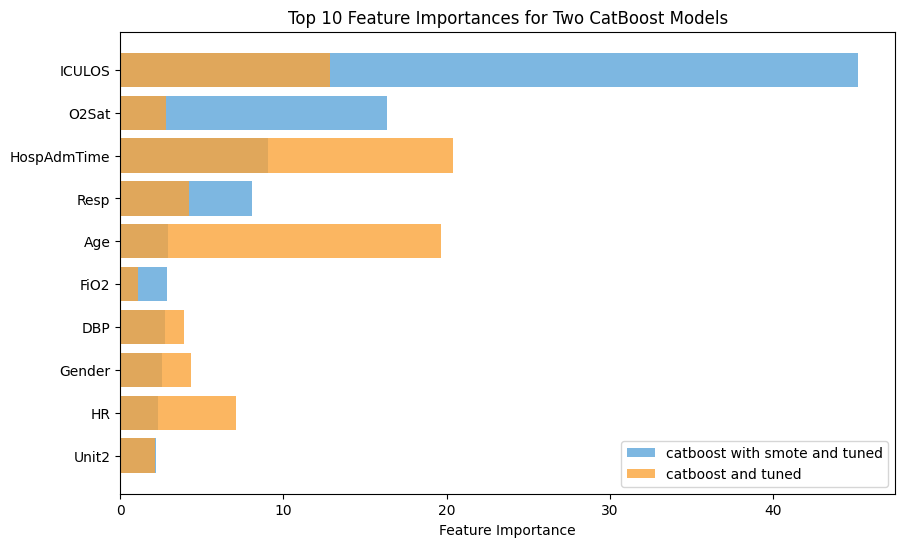

In [31]:
# Get the feature importances for both models
importances_1 = catboost_smote_tuned.get_feature_importance()
importances_2 = catboost_tuned.get_feature_importance()

# Sort the feature importances of model 1 and get the indices of the top 10 features
sorted_indices_1 = np.argsort(importances_1)[-10:]
sorted_importances_1 = importances_1[sorted_indices_1]

# Get the feature importances of model 2 for the same features as model 1
importances_2_top_10 = [importances_2[i] for i in sorted_indices_1]

# Set the colors for each model
color_1 = '#5DA5DA'  # blue
color_2 = '#FAA43A'  # orange

# Plot the feature importances of both models
plt.figure(figsize=(10, 6))
plt.barh(range(10), sorted_importances_1, align='center', alpha=0.8, color=color_1, label='catboost with smote and tuned')
plt.barh(range(10), importances_2_top_10, align='center', alpha=0.8, color=color_2, label='catboost and tuned')
plt.yticks(range(10), [df_final.columns[i] for i in sorted_indices_1])
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importances for Two CatBoost Models')
plt.legend()
plt.show()


### XGboost with Smote

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE

stratified_kfold = StratifiedKFold(n_splits=2, shuffle=True, random_state=1)

smote = SMOTE(random_state=1)
X_train_sampled, y_train_sampled = smote.fit_resample(mean_imputed_train, y_train)



pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', XGBClassifier(random_state=1))
])

param_grid = {
    'classifier__n_estimators': [100, 150, 200],
    'classifier__max_depth': [3,4,5],
    'classifier__learning_rate': [.01, .1]
}

random_search = RandomizedSearchCV(
    pipeline, param_distributions=param_grid, n_iter=2, cv=stratified_kfold, scoring='f1', n_jobs=-1, random_state=1, verbose=2,
)

random_search.fit(X_train_sampled, y_train_sampled)
best_params = random_search.best_params_
print('Best Parameters')
for param, value in best_params.items():
    print(f"{param}: {value}")

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(mean_imputed_train)
X_test_scaled = scaler.transform(mean_imputed_test)
smote = SMOTE(random_state=1)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

xgb_smote_tuned = XGBClassifier(n_estimators=100, max_depth=5, learning_rate=.01, random_state=1)
xgb_smote_tuned.fit(X_train_resampled, y_train_resampled)

print(performance_scores(xgb_smote_tuned, X_test_scaled, y_test))

### XGboost with tunning

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=2, shuffle=True, random_state=1)

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', XGBClassifier(random_state=1))
])

param_grid = {
    'classifier__n_estimators': [100, 150, 200],
    'classifier__max_depth': [6,7,8],
    'classifier__learning_rate': [.1, .01, None]
}

random_search = RandomizedSearchCV(
    pipeline, param_distributions=param_grid, n_iter=1, cv=stratified_kfold, scoring='f1', n_jobs=-1, random_state=1, verbose=2,
)

random_search.fit(mean_imputed_train, y_train)
best_params = random_search.best_params_
print('Best Parameters')
for param, value in best_params.items():
    print(f"{param}: {value}")

In [39]:
%%time
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(mean_imputed_train)
X_test_scaled = scaler.transform(mean_imputed_test)
xgb_raw = XGBClassifier(n_estimators=200, max_depth=8, learning_rate=.1, random_state=1).fit(X_train_scaled, y_train)

print(performance_scores(xgb_raw, X_test_scaled, y_test))

{'roc': 0.8795186407287565, 'recall': 0.03815153143471252, 'precision': 0.8693877551020408, 'f1': 0.07309540150995196}
CPU times: user 36min 6s, sys: 1.4 s, total: 36min 7s
Wall time: 4min 51s


In [60]:
from sklearn.metrics import roc_curve, auc

def plot_roc_curves(y_true, X_test, catboost_model, xgb_model, title='ROC Curves between best CatBoost and best XGboost ', figsize=(10, 6)):
    # Compute predictions for CatBoost and XGBoost models
    catboost_preds = catboost_model.predict_proba(X_test)[:, 1]
    xgb_preds = xgb_model.predict_proba(X_test)[:, 1]

    # Calculate ROC curve and AUC score for CatBoost
    catboost_fpr, catboost_tpr, _ = roc_curve(y_true, catboost_preds)
    catboost_auc = auc(catboost_fpr, catboost_tpr)

    # Calculate ROC curve and AUC score for XGBoost
    xgb_fpr, xgb_tpr, _ = roc_curve(y_true, xgb_preds)
    xgb_auc = auc(xgb_fpr, xgb_tpr)

    # Random classifier line
    random_classifier_fpr = np.linspace(0, 1, 100)
    random_classifier_tpr = np.linspace(0, 1, 100)

    # Create the ROC curve plot
    plt.figure(figsize=figsize)
    plt.plot(catboost_fpr, catboost_tpr, label=f'CatBoost (AUC = {catboost_auc:.2f})')
    plt.plot(xgb_fpr, xgb_tpr, label=f'XGBoost (AUC = {xgb_auc:.2f})')
    plt.plot(random_classifier_fpr, random_classifier_tpr, linestyle='--', label='Random Classifier (AUC = 0.5)')

    # Set plot title, labels, and legend
    plt.title(title)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')

    # Show the plot
    plt.show()


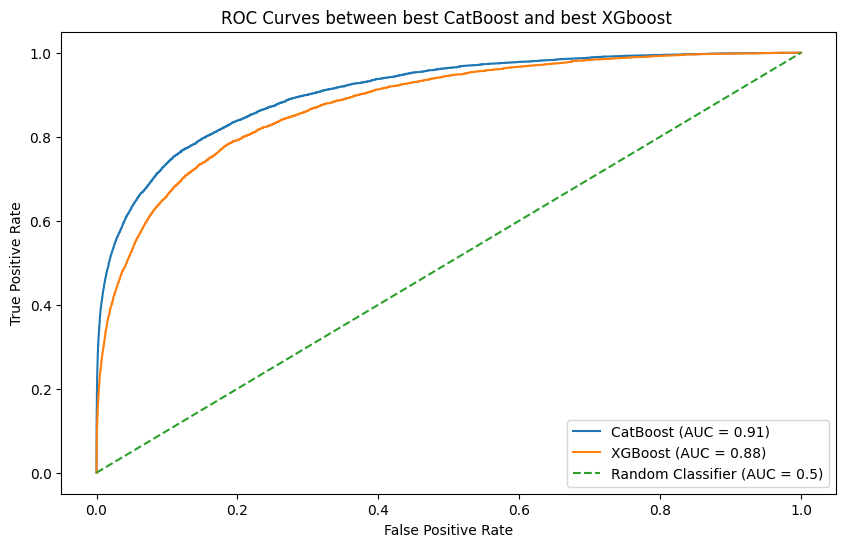

In [61]:
plot_roc_curves(y_test, X_test_scaled, catboost_tuned, xgb_raw)

In [62]:
from sklearn.metrics import precision_recall_curve, auc

def plot_precision_recall_curves(y_true, X_test, catboost_tuned, xgb_raw, title='Precision-Recall Curves between best CatBoost and best XGboost ', figsize=(10, 6)):
    # Compute predictions for CatBoost and XGBoost models
    catboost_preds = catboost_tuned.predict_proba(X_test)[:, 1]
    xgb_preds = xgb_raw.predict_proba(X_test)[:, 1]

    # Calculate precision-recall curve and AUC score for CatBoost
    catboost_precision, catboost_recall, _ = precision_recall_curve(y_true, catboost_preds)
    catboost_auc = auc(catboost_recall, catboost_precision)

    # Calculate precision-recall curve and AUC score for XGBoost
    xgb_precision, xgb_recall, _ = precision_recall_curve(y_true, xgb_preds)
    xgb_auc = auc(xgb_recall, xgb_precision)


    # Create the precision-recall curve plot
    plt.figure(figsize=figsize)
    plt.plot(catboost_recall, catboost_precision, label=f'CatBoost (AUC = {catboost_auc:.2f})')
    plt.plot(xgb_recall, xgb_precision, label=f'XGBoost (AUC = {xgb_auc:.2f})')
    
    # Set plot title, labels, and legend
    plt.title(title)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc='lower left')

    # Show the plot
    plt.show()



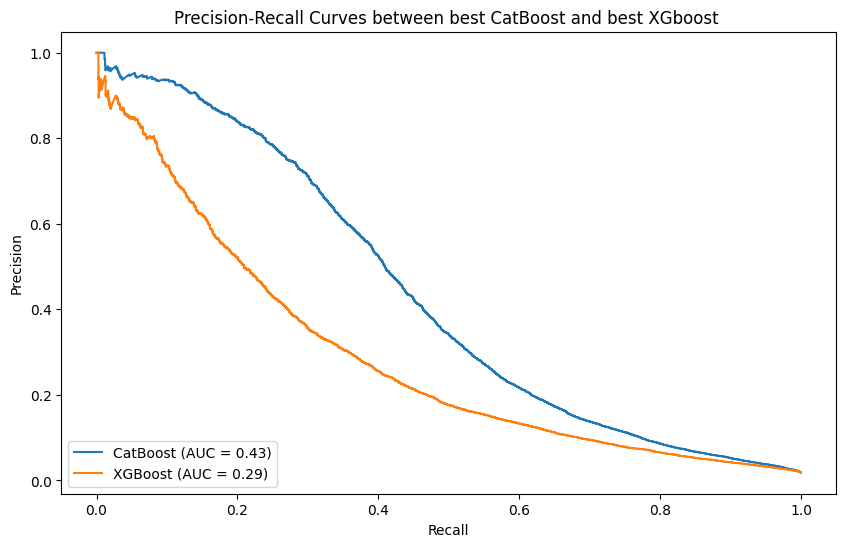

In [63]:
plot_precision_recall_curves(y_test, X_test_scaled, catboost_tuned, xgb_raw)

### Custom Resampling Method

In [ ]:
train_minority = train_data[train_data['SepsisLabel'] == 1]
train_majority = train_data[train_data['SepsisLabel'] == 0]
print(train_minority.shape)
print(train_majority.shape[0] - train_minority.shape[0])
upsampled_minority = pd.DataFrame(columns=train_minority.columns)
print((train_minority['Unit1'].median()))

import random

row_list = []
for i in range(train_minority.shape[0]):

# for i in range(2):
    new_row = {}
    for j in range(len(train_minority.columns)):
        choice = random.randint(0,1)
        if choice == 0:
            # take median of non-NaN rows and use it
            new_row[train_minority.columns[j]] = train_minority[train_minority.columns[j]].median()
        if choice == 1:
            # take mean of non-NaN rows and use it
            new_row[train_minority.columns[j]] = train_minority[train_minority.columns[j]].mean()
            # upsampled_minority.ix[i, upsampled_minority[j]] = combined_minority[upsampled_minority[j]].mean()
    row_list.append(new_row)
    # print(new_row)
    # pd.concat([upsampled_minority, pd.DataFrame([new_row])], ignore_index=True)
    # print(upsampled_minority)
row_list_df = pd.DataFrame(row_list)
print(row_list_df)

upsampled_train_minority = pd.concat([row_list_df, train_minority])
upsampled_train_minority.shape
upsampled_train_total = pd.concat([upsampled_train_minority, train_majority])
upsampled_train_total.shape